In [1]:
# 导入相关依赖库
import time
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 默认设置
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

In [2]:
# 加载CSV数据
data = pd.read_csv('cpu_data.csv', engine='python', skipfooter=0)

In [3]:
# 数据集预处理
data['time']=pd.to_datetime(data['time'], format='%Y-%m-%d %H:%M:%S')
data.set_index(['time'], inplace=True)
data

,value
time,
2018-11-18 00:00:00,37
2018-11-18 02:00:00,37
2018-11-18 04:00:00,37
2018-11-18 06:00:00,37
2018-11-18 08:00:00,37
2018-11-18 10:00:00,37
2018-11-18 12:00:00,38
2018-11-18 14:00:00,37
2018-11-18 16:00:00,37


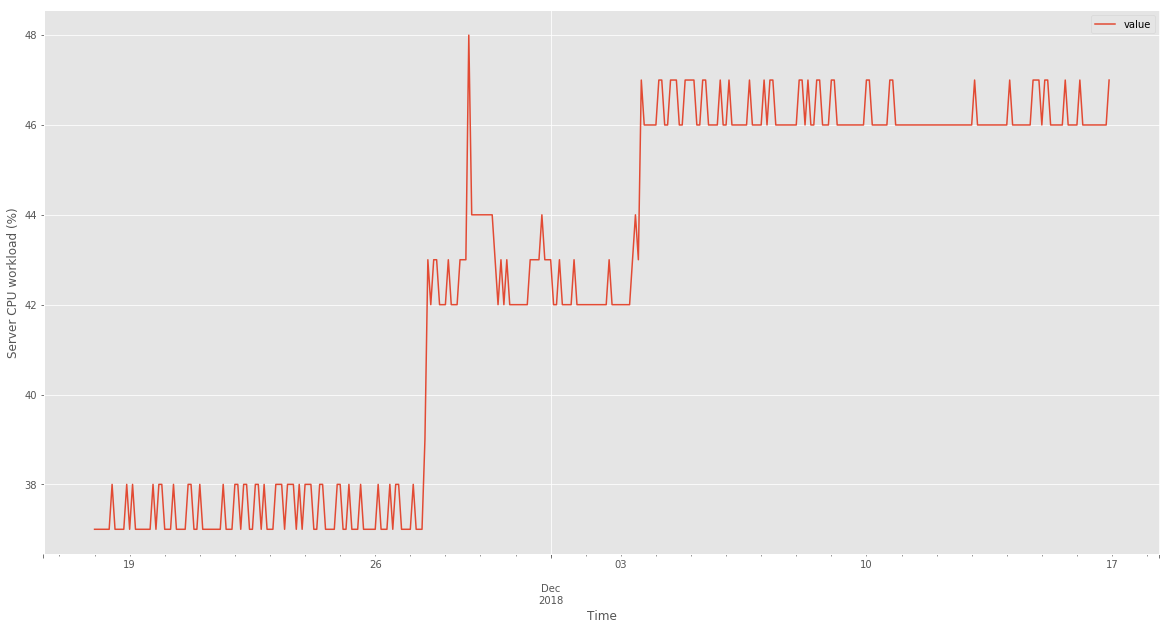

In [4]:
# 用Plot绘制数据集
data.plot()
plt.ylabel('Server CPU workload (%)')
plt.xlabel('Time')
plt.show()

In [5]:
# 定义d和q参数以获取0到1之间的任何值
q = d = range(0, 2)
# 定义p参数以获取0到3之间的任何值
p = range(0, 4)

# 生成p，q和q的所有不同组合
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1),
 (2, 0, 0),
 (2, 0, 1),
 (2, 1, 0),
 (2, 1, 1),
 (3, 0, 0),
 (3, 0, 1),
 (3, 1, 0),
 (3, 1, 1)]

In [6]:
# 生成季节性p，q和q三元组的所有不同组合,这里s=12,每2小时间隔的监控采集值
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('季节性ARIMA的参数组合示例')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

季节性ARIMA的参数组合示例
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [7]:
# 训练集
train_data = data['2018-11-18 00:00:00':'2018-12-15 22:00:00']
train_data

,value
time,
2018-11-18 00:00:00,37
2018-11-18 02:00:00,37
2018-11-18 04:00:00,37
2018-11-18 06:00:00,37
2018-11-18 08:00:00,37
2018-11-18 10:00:00,37
2018-11-18 12:00:00,38
2018-11-18 14:00:00,37
2018-11-18 16:00:00,37


In [8]:
# 测试集，这里是真实的数据值，充当标记lable，用于对比预测值进行误差分析。
test_data = data['2018-12-16 00:00:00':'2018-12-16 22:00:00']
test_data

,value
time,
2018-12-16 00:00:00,46
2018-12-16 02:00:00,47
2018-12-16 04:00:00,46
2018-12-16 06:00:00,46
2018-12-16 08:00:00,46
2018-12-16 10:00:00,46
2018-12-16 12:00:00,46
2018-12-16 14:00:00,46
2018-12-16 16:00:00,46


In [9]:
# 忽略警告消息
warnings.filterwarnings("ignore") 

# 计时器开启
start = time.time()

# 计算AIC参数, 根据训练数据集的大小和参数范围选择耗时不同。
AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue
            
# 计算耗时
'%.2f sec' % (time.time() - start)

'355.48 sec'

In [10]:
print('最小 AIC 值为: {} 对应模型参数: SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

最小 AIC 值为: 644.8516694726648 对应模型参数: SARIMAX(3, 1, 0)x(3, 1, 1, 12)


In [11]:
# 使用训练数据拟合模型
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

In [12]:
# 进行预测
pred = results.get_forecast('2018-12-17 00:00:00')
pred_ci = pred.conf_int()
print(pred.predicted_mean['2018-12-16 00:00:00':'2018-12-16 22:00:00'])

2018-12-16 00:00:00    46.104565
2018-12-16 02:00:00    46.326216
2018-12-16 04:00:00    46.007188
2018-12-16 06:00:00    45.954389
2018-12-16 08:00:00    46.026571
2018-12-16 10:00:00    46.107635
2018-12-16 12:00:00    46.111925
2018-12-16 14:00:00    46.403627
2018-12-16 16:00:00    46.764897
2018-12-16 18:00:00    46.217940
2018-12-16 20:00:00    46.197851
2018-12-16 22:00:00    46.124081
Freq: 2H, dtype: float64


In [13]:
# 样本数据测试集(历史真实数据，即标记数据)
test_data

,value
time,
2018-12-16 00:00:00,46
2018-12-16 02:00:00,47
2018-12-16 04:00:00,46
2018-12-16 06:00:00,46
2018-12-16 08:00:00,46
2018-12-16 10:00:00,46
2018-12-16 12:00:00,46
2018-12-16 14:00:00,46
2018-12-16 16:00:00,46


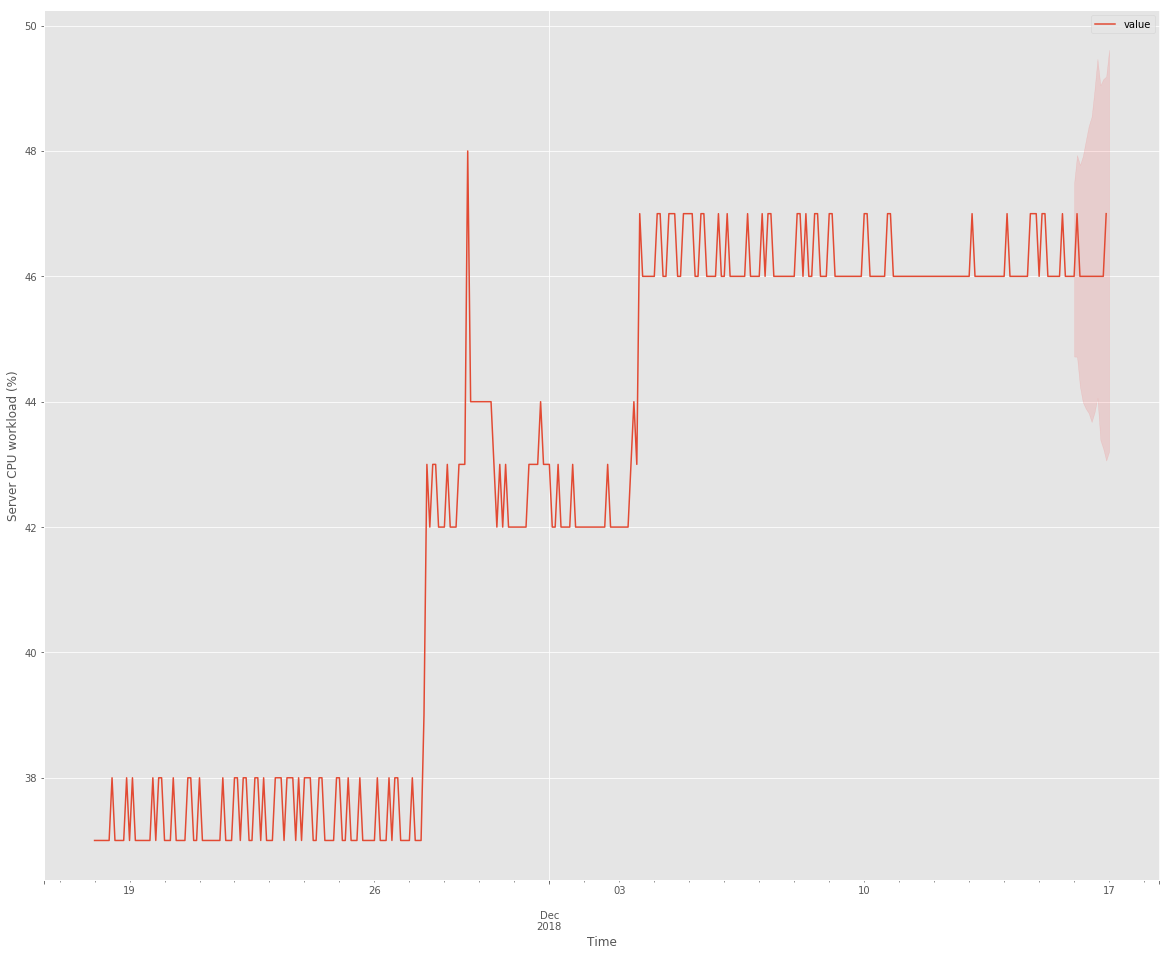

In [14]:
# 通过plot绘图显示预测效果
ax = data.plot(figsize=(20, 16))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='R', alpha=.1)
plt.ylabel('Server CPU workload (%)')
plt.xlabel('Time')
plt.legend()
plt.show()

In [16]:
# 误差率计算
prediction = pred.predicted_mean['2018-12-16 00:00:00':'2018-12-16 22:00:00'].values
# 合并样本数据中测试集嵌套列表
truth = list(itertools.chain.from_iterable(test_data.values))
# Mean Absolute Percentage Error
MAPE = np.mean(np.abs((truth - prediction) / truth)) * 100

print('2018-12-16当日预测的平均绝对百分比误差是 {:.2f}%'.format(MAPE))

2018-12-16当日预测的平均绝对百分比误差是 0.63%
